In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# **Drop Unnamed Column**

In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# **Removing null values**

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [8]:
df = df.drop("Unnamed: 0", axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2  female     group B     master's degree      standard       none   
4    male     group C        some college      standard       none   
5  female     group B  associate's degree      standard       none   
6  female     group B        some college      standard  completed   
7    male     group B        some college  free/reduced       none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
2              single     sometimes          yes         4.0     school_bus   
4             married     sometimes          yes         0.0     school_bus   
5             married     regularly          yes         1.0     school_bus   
6             widowed         never           no         1.0        private   
7             married     sometimes          yes         1.0        private   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
2            < 5         87            93     

# **Change weekly study hours column**

In [9]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-100","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5-10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5-10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


# **Gender distribution**

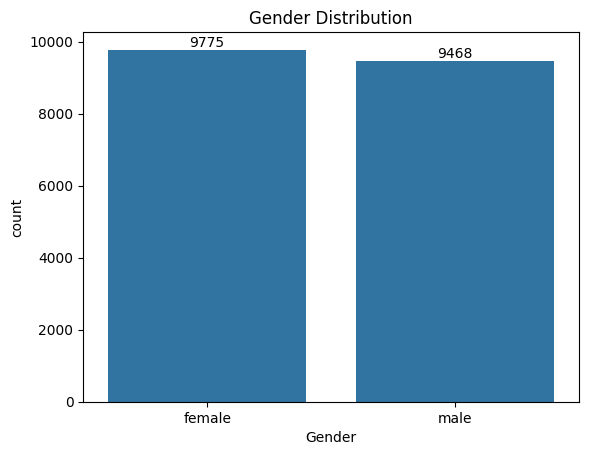

In [10]:
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [11]:
#From the above chart we have analyzed that :
#the number of females in the data is more than the number 0f males

In [12]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


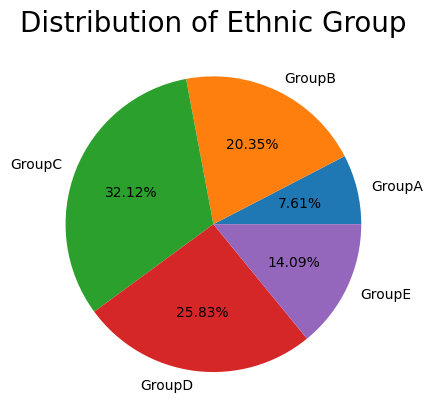

In [13]:
GroupA = df.loc[(df["EthnicGroup"] == "group A")].count()
GroupB = df.loc[(df["EthnicGroup"] == "group B")].count()
GroupC = df.loc[(df["EthnicGroup"] == "group C")].count()
GroupD = df.loc[(df["EthnicGroup"] == "group D")].count()
GroupE = df.loc[(df["EthnicGroup"] == "group E")].count()
l=["GroupA","GroupB","GroupC","GroupD","GroupE"]
mlist=[GroupA["EthnicGroup"],GroupB["EthnicGroup"],GroupC["EthnicGroup"],GroupD["EthnicGroup"],GroupE["EthnicGroup"]]
plt.title("Distribution of Ethnic Group",fontsize=20)
plt.pie(mlist, labels=l, autopct="%1.2f%%")
plt.show()

In [14]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


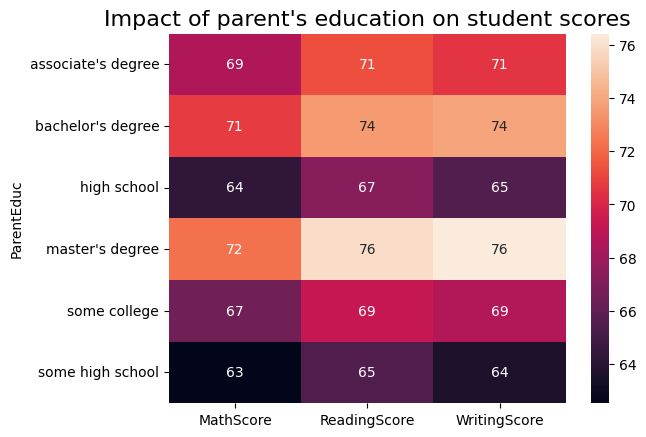

In [15]:
sns.heatmap(gb,annot=True)
plt.title("Impact of parent's education on student scores",fontsize=16)
plt.show()

In [16]:
#From the above chart we have concluded that the education of parents have a good impact on studednt scores

In [17]:
gb1 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.593871     68.774244     67.021334
regularly      67.636547     69.950791     69.641439
sometimes      66.461143     69.438085     68.279568


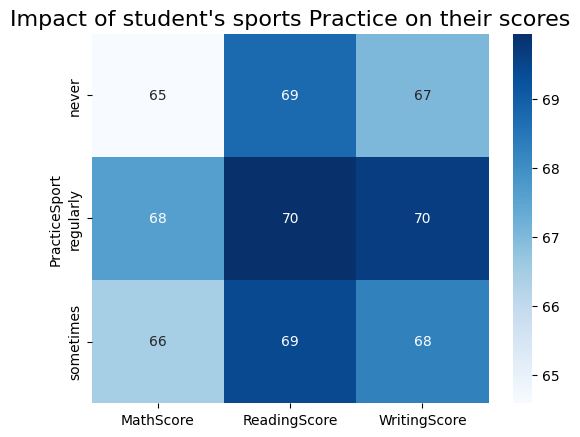

In [18]:
sns.heatmap(gb1,annot=True,cmap="Blues")
plt.title("Impact of student's sports Practice on their scores",fontsize=16)
plt.show()

In [19]:
# From the above chart we have concluded that there is little impact on student scores due to sports practice

In [20]:
gb2 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


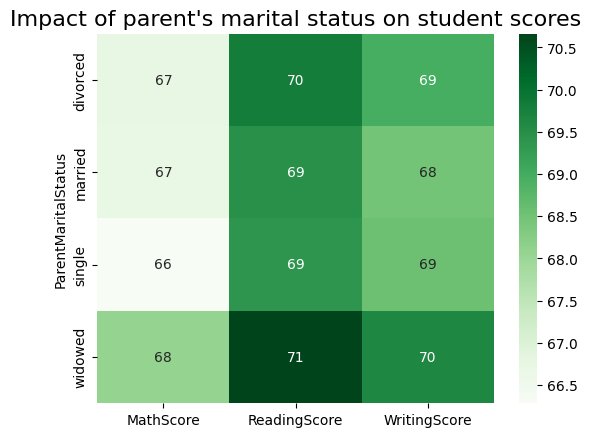

In [21]:
sns.heatmap(gb2,annot=True,cmap="Greens")
plt.title("Impact of parent's marital status on student scores",fontsize=16)
plt.show()

In [22]:
#From the above chart we have concluded that there is no/negligible impact on student scores due to parents marital status

In [23]:
gb3 = df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.789262     69.845961     68.961867
1.0         66.579434     69.409839     68.416127
2.0         66.472631     69.433282     68.486041
3.0         66.800097     69.620039     68.787996
4.0         66.356665     69.433865     68.502831
5.0         66.940211     69.702227     68.583822
6.0         67.568182     69.170455     68.301136
7.0         67.557895     70.973684     70.310526


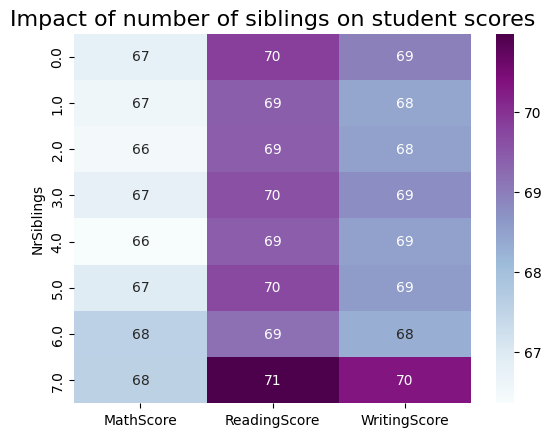

In [24]:
sns.heatmap(gb3,annot=True,cmap="BuPu")
plt.title("Impact of number of siblings on student scores",fontsize=16)
plt.show()

In [25]:
# From the above chart we concluded that there is no/negligible impact on student scores due to number of siblings they have

In [26]:
gb4 = df.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.464401     69.398623     68.557867
yes           66.729564     69.608923     68.627607


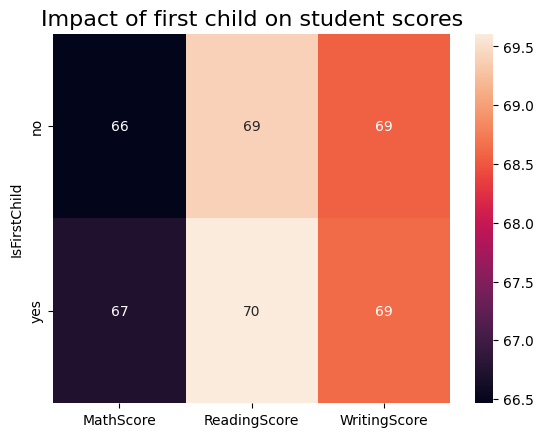

In [27]:
sns.heatmap(gb4,annot=True,)
plt.title("Impact of first child on student scores",fontsize=16)
plt.show()

In [28]:
#From the above chart we have concluded that there is very little impact on student scores if he/she is a first child